# Описание проекта

<h1>Аналитика популярного сервиса аренды самокатов GoFast. </h1>
Были передали данные о некоторых пользователях из нескольких городов, а также об их поездках.
<h1>Цель проекта:</h1>
Необходимо проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

<h1> Информация о проекте:</h1>

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки
    * абонентская плата отсутствует;
    * стоимость одной минуты поездки — 8 рублей;
    * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
    * абонентская плата — 199 рублей в месяц;
    * стоимость одной минуты поездки — 6 рублей;
    * стоимость старта — бесплатно.

<h1> Инструкция к данным:

<p>Есть информация о пользователях, их поездках и подписках.</p>
<p>Пользователи — <code>users_go.csv</code></p>
<ul>
<li><code>user_id</code> - уникальный идентификатор пользователя</li>
<li><code>name</code> - имя пользователя</li>
<li><code>age</code> - возраст</li>
<li><code>city</code> - город</li>
<li><code>subscription_type</code> - тип подписки (free, ultra)</li>
</ul>
<p>Поездки — <code>rides_go.csv</code></p>
<ul>
<li><code>user_id</code> - уникальный идентификатор пользователя</li>
<li><code>distance</code> - расстояние, которое пользователь проехал в текущей сессии (в метрах)</li>
<li><code>duration</code> - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»</li>
<li><code>date</code> - дата совершения поездки</li>
</ul>
<p>Подписки — <code>subscriptions_go.csv</code></p>
<ul>
<li><code>subscription_type</code> - тип подписки</li>
<li><code>minute_price</code> - стоимость одной минуты поездки по данной подписке</li>
<li><code>start_ride_price</code> - стоимость начала поездки</li>
<li><code>subscription_fee</code> - стоимость ежемесячного платежа</li>
</ul>

# Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

# Шаг 1. Считываем файлы и смотрим основную информацию

<h1>Файл про пользователей:

In [2]:
data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
data_users.shape

(1565, 5)

In [3]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Согласно документации к данным:
  * `user_id`	уникальный идентификатор пользователя
  * `name`	имя пользователя
  * `age`	возраст
  * `city`	город
  * `subscription_type`	тип подписки (free, ultra)

<h1>Файл про поездки

In [4]:
data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
data_rides.shape

(18068, 4)

In [5]:
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Согласно документации к данным:
  * `user_id`	уникальный идентификатор пользователя
  * `distance`	расстояние, которое пользователь проехал в текущей сессии (в метрах)
  * `duration`	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
  * `date`	дата совершения поездки

<h1>Файл про подписки:

In [6]:
data_subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
data_subscriptions.shape

(2, 4)

In [7]:
data_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Согласно документации к данным:
  * `subscription_type` -	тип подписки
  * `minute_price` -	стоимость одной минуты поездки по данной подписке(в метрах)
  * `start_ride_price` -	стоимость начала поездки
  * `subscription_fee` -	стоимость ежемесячного платежа

# Шаг 2.Предобработка данных

`data_subscriptions` в предобработке не нуждается

# `data_users`:

In [8]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


<h1> Пропуски:

In [9]:
data_users.isnull().sum()

,0
user_id,0
name,0
age,0
city,0
subscription_type,0


В данных о пользователях нет пропусков

<h1> Дубликаты:

Имя, город, тип подписки и возраст могут совпадать у разных людей, при чем есть небольшая вероятность, что все эти данные могут совпадать одновременно.

Поэтому будем искать дубликаты в столбце `user_id`.

In [10]:
data_users['user_id'].duplicated().sum()

31

Кажется, дубликаты имеются.

In [11]:
data_users['user_id'].value_counts().head()

,count
user_id,
209,2
807,2
611,2
43,2
737,2


Проверим, заносилось ли информация дважды про одного человека или имел место технический сбой и под одним `user_id` зарегестрировали разных людей.

In [12]:
data_users.loc[data_users['user_id'].duplicated(False)].sort_values(by='user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


По какой-то причине про некоторых пользователей информация дублировалась. Необходимо составить рапорт и передать эту информацию тех.поддержке.

In [13]:
data_users.duplicated().tail(31).sum()

31

Заметим, что все последние 31 строка - дубликаты. То есть все дубликаты - это последние 31 строк.

Сообщим техподдержке, что в полученных данных последние 31 строк - дубликаты.

Так как все дубликаты несут одну и ту же информацию, удалим их. (Будем оставлять первую запись о пользователе)

In [14]:
data_users = data_users.drop_duplicates()

In [15]:
data_users.shape

(1534, 5)

# `data_rides`:

In [16]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


<h1> Пропуски:

In [17]:
data_rides.isnull().sum()

,0
user_id,0
distance,0
duration,0
date,0


В данных о поездках нет пропусков

<h1>Дубликаты:

В данной таблице дубликатами можно считать только те строки, в которых все данные совпадут.

In [18]:
data_rides.duplicated().sum()

0

Дубликатов нет.

<h1> Типы данных

столбец `date` переведем в тип данных `datetime64[ns]` для дальшейнего анализа

In [19]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d' )
data_rides['date']

,date
0,2021-01-01
1,2021-01-18
2,2021-04-20
3,2021-08-11
4,2021-08-28
...,...
18063,2021-11-04
18064,2021-11-16
18065,2021-11-18
18066,2021-11-27


<h1> Создадим новый столбец с номером месяца</h1>

In [20]:
data_rides['month'] = pd.DatetimeIndex(data_rides['date']).month
data_rides['month']

,month
0,1
1,1
2,4
3,8
4,8
...,...
18063,11
18064,11
18065,11
18066,11


<h1> Округление столбца duration в большую сторону и перевод в тип данных int

In [21]:
data_rides['duration'] = np.ceil(data_rides['duration']).astype(int)

# Шаг 3.Исследовательский анализ данных

<h1> Опишем и визуализируем частоту встречаемости городов

Посмотрим все возможные значения

In [22]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

В данных представлены данные о пользователях из 8 городов.

Отсортируем города по количеству пользователей от большего к меньшему.

In [23]:
data_users['city'].value_counts()

,count
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Больше всего пользователей из Пятигорска, меньше всего - из Москвы. Визуализируем на графиках

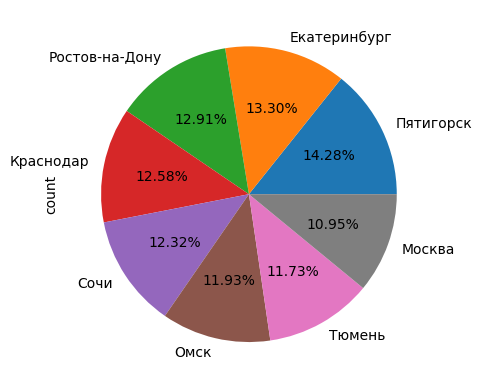

In [24]:
data_users['city'].value_counts().plot(kind='pie', autopct= '%1.2f%%')
plt.show()

Все города представлены примерно одинаково, разница между Пятигорском и Москвой менее 4%.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


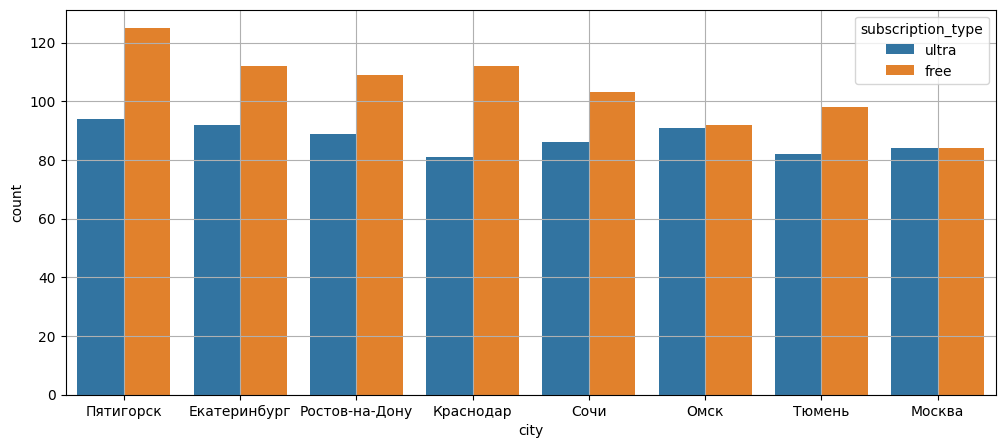

In [25]:
city_order = data_users['city'].value_counts().index
plt.figure(figsize=(12,5))
sns.countplot(data = data_users, x = 'city', hue = 'subscription_type', order = city_order )
plt.grid()
plt.show()

Заметим, что во всех городах, кроме Москвы и Омска, доминирует бесплатная подписка. В Москве и Омске примерно одинаковое соотношение бесплатных и платных подписок.

<h1> Опишем и визуализируем соотношение пользователей с подпиской и без подписки.


In [26]:
data_users['subscription_type'].value_counts()

,count
subscription_type,
free,835
ultra,699


Пользователей с подпиской `free` немного больше, чем пользователей с подпиской `ultra`. Добавим визуализации

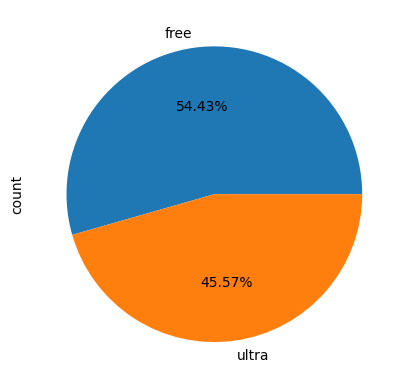

In [27]:
data_users['subscription_type'].value_counts().plot(kind='pie', autopct= '%1.2f%%')
plt.show()

Пользователей с подпиской `free` около 54%, тогда как на подписку `ultra` приходится около 46% пользователей.

<h1> Возраст пользователей

In [28]:
data_users['age'].describe()

,age
count,1534.000000
mean,24.903520
std,4.572367
min,12.000000
25%,22.000000
50%,25.000000
75%,28.000000
max,43.000000


Минимальный возраст пользователя - 12 лет, максимальный - 43 года, а средний - 25 лет.

Большинству пользоватей от 22 до 28 лет.


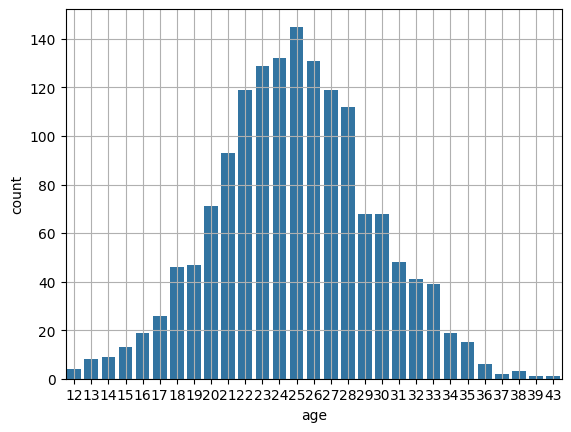

In [29]:
sns.countplot(data = data_users, x = 'age')
plt.grid()
plt.show()

Видим график нормального распределения - больше всего пользователей около 25 лет, а пользователей до 15 или после 35 практически нет.

<h1> Расстояние, которое пользователь преодолевает за одну поездку

In [30]:
data_rides['distance'].describe()

,distance
count,18068.000000
mean,3070.659976
std,1116.831209
min,0.855683
25%,2543.226360
50%,3133.609994
75%,3776.222735
max,7211.007745


В среднем пользователь проезжает 3134 метра.

Минимальное расстояние - всего 0.85 м - аномалия. Либо какая-то техническая ошибка, либо пользователь нажал на кнопку "Начать поездку" и не проехав и метра нажал "Завершить поездку", что поездкой тоже не является.

Стандартное отклонение также довольно большое, поэтому при последующем анализе следует исключить выбросы.

Визуализируем выбросы:

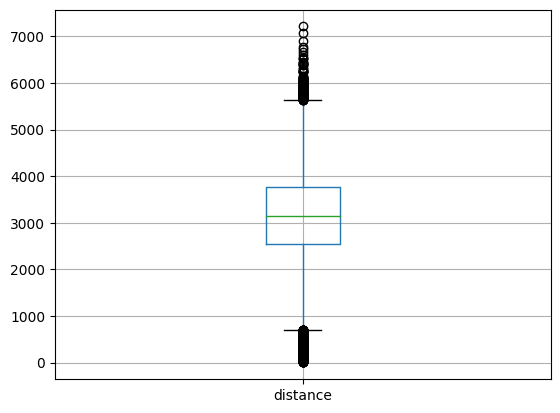

Нормальные значения лежат в диапазоне от 693.73 м до 5626 м


In [31]:
data_rides.boxplot('distance')
min_value = data_rides['distance'].describe()['min']
Q1 = data_rides['distance'].describe()['25%']
Q3 = data_rides['distance'].describe()['75%']
max_value = data_rides['distance'].describe()['max']
interquartile_range = Q3 - Q1
min_normal_value = max(Q1 - 1.5 * interquartile_range, min_value)
max_normal_value = min(Q3 + 1.5 * interquartile_range, max_value)
plt.show()
print(f'Нормальные значения лежат в диапазоне от {round(min_normal_value,2)} м до {round(max_normal_value)} м')

В переменную `good_data_rides` поместим очищенные от выбросов данные поездок

In [32]:
good_data_rides=data_rides.query("@min_normal_value<=distance<=@max_normal_value")

In [33]:
print(
    f'Данных осталось: {round(good_data_rides.shape[0]/data_rides.shape[0] * 100,2)}%'
    )

Данных осталось: 94.27%


Удалили менее 6% данных, зато оставшиеся данные не вызывают сомнений и не являются редкими.

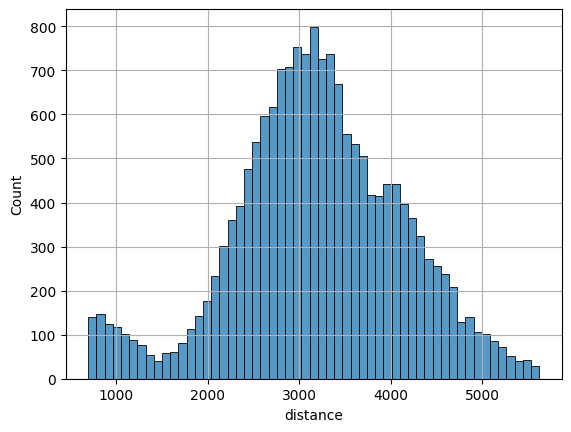

In [34]:
sns.histplot(good_data_rides['distance'])
plt.grid()
plt.show()

От 1500 м до 5000 м распределение близко к нормальному - этого мы и ожидали. Но около 800 м тоже расположен своеобразный пик, который требует объяснения. Возможно, есть отдельная группа пользователей, которым удобно передвигаться на небольное расстояние.

<h1> Продолжительность поездок

In [35]:
good_data_rides['duration'].describe()

,duration
count,17032.000000
mean,18.747299
std,5.794062
min,1.000000
25%,15.000000
50%,19.000000
75%,22.000000
max,41.000000


В среднем поездка занимает от  13.5 минут до 22 минут, а чаще всего - около 17.5 минут. Но бывают поездки менее 1 минуты и более 40.

Посмотрим на распределение:

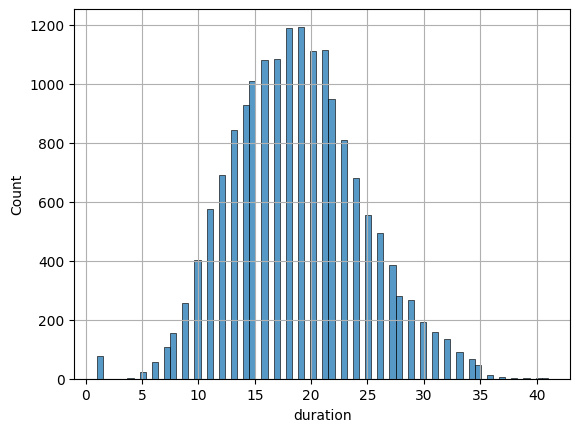

In [36]:
sns.histplot(good_data_rides['duration'])
plt.grid()
plt.show()

Заметим пик около 1 минуты. Можно предположить, что он соответствует пику около 800 м - дистанции.

В остальном же график соответствует нормальному распределению.

Посмотрим на поездки менее 2 минут подробнее.

In [37]:
good_data_rides.query('duration<2')

,user_id,distance,duration,date,month
6531,701,4196.445201,1,2021-08-31,8
6570,704,4830.824371,1,2021-10-14,10
6680,712,4684.004397,1,2021-03-04,3
6695,713,5215.642710,1,2021-02-25,2
6768,718,5197.436649,1,2021-02-11,2
...,...,...,...,...,...
16704,1436,5409.750250,1,2021-06-18,6
16754,1439,4324.482439,1,2021-12-27,12
17004,1460,5531.335845,1,2021-01-19,1
17314,1483,4445.481070,1,2021-03-06,3


Видна аномалия. Вряд ли пользователи успевают проехать за первую минуту больше 4000 метров. При этом средняя скорость может доходить до 500 км/ч. Предположение про пик 800 м дистанции отвергается.

Посмотрим внимательно на поездки с длительностью до 2 минут.

In [38]:
good_data_rides.query('duration<=2').sort_values(by='distance')

,user_id,distance,duration,date,month
15132,1325,4030.308008,1,2021-12-22,12
17909,1524,4103.998874,1,2021-06-18,6
10692,1006,4106.278268,1,2021-10-31,10
9698,937,4169.066800,1,2021-12-12,12
14342,1268,4177.139336,1,2021-06-09,6
...,...,...,...,...,...
11096,1035,5488.776296,1,2021-07-28,7
15818,1378,5505.418662,1,2021-08-04,8
17004,1460,5531.335845,1,2021-01-19,1
15112,1324,5537.095264,1,2021-09-16,9


Абсолютно все поездки до 2-ух минут соответсвуют расстоянию от 4 км, что невозможно чисто физически.

Попытаемся выяснить причину аномалии.

Из таблицы видно, что от даты это не зависит, возможно зависит от самого пользователя.

In [39]:
good_data_rides.query('user_id==1325').sort_values(by='duration').head()

,user_id,distance,duration,date,month
15132,1325,4030.308008,1,2021-12-22,12
15123,1325,1967.372638,12,2021-06-22,6
15120,1325,3956.285420,14,2021-05-05,5
15129,1325,2876.109675,14,2021-10-23,10
15121,1325,2104.593578,15,2021-05-26,5


In [40]:
good_data_rides.query('user_id==1524').sort_values(by='duration').head()

,user_id,distance,duration,date,month
17909,1524,4103.998874,1,2021-06-18,6
17912,1524,2243.168657,7,2021-11-08,11
17904,1524,2428.811135,9,2021-02-24,2
17905,1524,2929.257768,9,2021-03-20,3
17911,1524,4829.325021,12,2021-08-20,8


Никакой связи не прослеживается.

Очевидно, произошла какая-то ошибка и данные перенеслись/заполнились неверно. При этом от даты и пользователя это не зависит, корретно заполнить данные не представляется возможным. Единственное сходство у всех строчках - дистанция от 4000 м.

Следует написать в тех.поддержку, что существует какой-то баг, из-за которого некоторые поездки расстоянием более 4000м заканчиваются в пределах минуты.

Очистим данные от недостоверных данных.

In [41]:
good_data_rides = good_data_rides.query('duration>=2')

# Шаг 4.Объединение данных

<h1>Создадим полную таблицу <code>full_stat_data</code> о поездках, которая также содержит всю информацию о пользователе.</h1>

In [42]:
full_stat_data = good_data_rides.merge(data_users)
full_stat_data

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,26,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,16,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,7,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,19,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,27,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
16951,1534,3781.098080,20,2021-11-04,11,Альберт,25,Краснодар,free
16952,1534,2840.423057,22,2021-11-16,11,Альберт,25,Краснодар,free
16953,1534,3826.185507,19,2021-11-18,11,Альберт,25,Краснодар,free
16954,1534,2902.308661,17,2021-11-27,11,Альберт,25,Краснодар,free


Выделим из `full_stat_data` данные о поездках пользователей без подписки: `users_no_subscribe_data`

In [43]:
users_no_subscribe_data = full_stat_data.query('subscription_type=="free"')
users_no_subscribe_data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
6409,700,2515.690719,15,2021-01-02,1,Айдар,22,Омск,free
6410,700,846.932642,17,2021-02-01,2,Айдар,22,Омск,free
6411,700,4004.434142,21,2021-02-04,2,Айдар,22,Омск,free
6412,700,1205.911290,10,2021-02-10,2,Айдар,22,Омск,free
6413,700,3047.379435,18,2021-02-14,2,Айдар,22,Омск,free


И с подпиской: `users_with_subscribe_data`

In [44]:
users_with_subscribe_data = full_stat_data.query('subscription_type=="ultra"')
users_with_subscribe_data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,26,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,16,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,7,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,19,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,27,2021-08-28,8,Кира,22,Тюмень,ultra


<h1>Посмотрим, отличается ли время поездки и расстояние от наличия у пользователя подписки.</h1>

Без подписки:

In [45]:
users_no_subscribe_data[['distance','duration']].describe()

,distance,duration
count,10547.000000,10547.000000
mean,3204.693568,18.624727
std,998.090297,5.780342
min,693.961245,4.000000
25%,2510.916658,14.000000
50%,3196.876944,18.000000
75%,3925.759021,22.000000
max,5623.316154,35.000000


C подпиской:

In [46]:
users_with_subscribe_data[['distance','duration']].describe()

,distance,duration
count,6409.000000,6409.000000
mean,3150.859363,19.159463
std,785.182695,5.505063
min,696.117142,5.000000
25%,2803.086016,15.000000
50%,3155.352550,19.000000
75%,3570.042143,22.000000
max,5419.684636,41.000000


Несмотря на то, что пользователей с подпиской и без неё примерно равное количество, суммарное количество поездок у пользователей без подписки почти в 2 раза больше, чем у пользователей с подпиской.

Стандартное отклонение расстояния намного меньше у пользователей с подпиской, т.е. разброс меньше.

У пользователей с подпиской в среднем расстояние меньше, чем у пользователей без подписки, а продолжительность сессии, наоборот, больше.

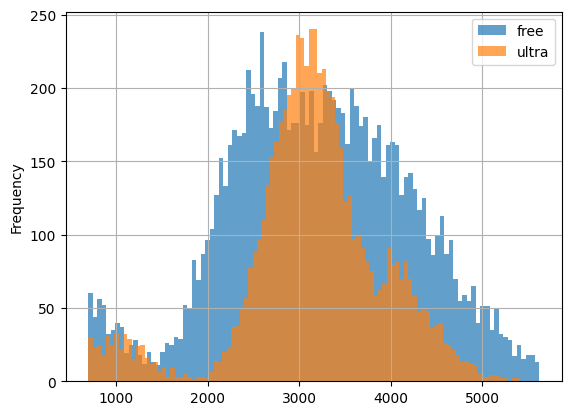

In [47]:
users_no_subscribe_data['distance'].plot(kind='hist', bins=100, alpha=0.7, label='free')
users_with_subscribe_data['distance'].plot(kind='hist', bins=100, alpha=0.7, label='ultra')
plt.legend()
plt.grid()
plt.show()

В среднем `ultra` пользователи проезжают 2800 м - 3500 м за поездку

А пользователи `free` - от 2300 м до 4000 м.

Также, поездки более 5000 м составляют преимущественно `free` пользователи

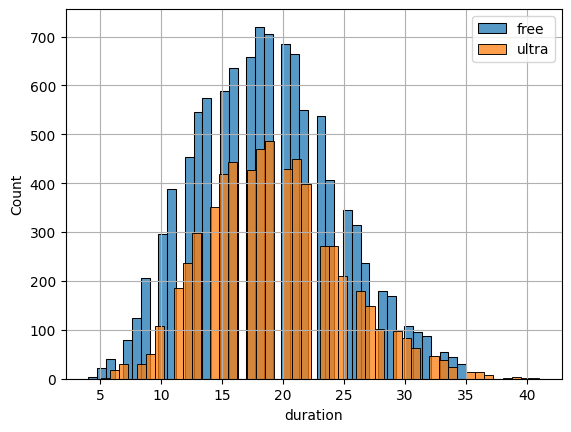

In [48]:
sns.histplot(users_no_subscribe_data['duration'], label='free')
sns.histplot(users_with_subscribe_data['duration'], label='ultra')
plt.grid()
plt.legend()
plt.show()

Распределение по времени выглядит идентично.

В среднем `ultra` пользователи проезжают за  15 мин - 22 мин.

А пользователи `free` - от 14 мин - 22 мин.


Поездки от 35 минут совершают преимущественно `ultra` пользователи. Что немного странно, ведь длинные поездки - от 5000 м совершают в основном `free` пользователи. Видимо никакой связи нет.


# Шаг 5. Подсчёт выручки

Сгруппируем данные по помесячной выручке по каждому пользователю:
* Месячная сумма продолжительностей всех сессий
* Месячная сумма расстояния, которое проехал пользователь
* Количество поездок
* Тип подписки

In [49]:
data_by_user_by_month = full_stat_data.pivot_table(index=('user_id', 'month'),
                                                   values=('duration','distance','subscription_type' ), aggfunc={'duration':'sum','distance':['sum', 'count'],'duration':'sum','subscription_type':'last'})
data_by_user_by_month.columns=['count_of_driving','sum_of_distance','duration', 'subscription_type']

Напишем функцию `monthly_price_calculation`, которая считает месячную выручку с данного пользователя (месячные затраты пользователя) и применим её к каждой строчке. Месячная выручка от каждого пользователя будет храниться в столбце `monthly_price`.



In [50]:
def monthly_price_calculation(data_by_user_by_month):
  if data_by_user_by_month['subscription_type'] == 'ultra':
    ind = 1
  else:
    ind = 0
  full_price =(
         data_subscriptions.loc[ind,'minute_price'] * data_by_user_by_month['duration']
       + data_subscriptions.loc[ind,'start_ride_price']
       + data_subscriptions.loc[ind,'subscription_fee'] )
  return(full_price)

data_by_user_by_month['monthly_price'] = data_by_user_by_month.apply(monthly_price_calculation, axis=1)
data_by_user_by_month

count_of_driving  sum_of_distance  duration subscription_type  \
user_id month                                                                  
1       1                     2      7027.511294        42             ultra   
        4                     1       754.159807         7             ultra   
        8                     2      6723.470560        46             ultra   
        10                    2      5809.911100        32             ultra   
        11                    3      7003.499363        56             ultra   
...                         ...              ...       ...               ...   
1534    6                     1      3214.021065        19              free   
        8                     2      7622.453034        48              free   
        9                     1      4928.173852        23              free   
        11                    4     13350.015305        78              free   
        12                    1      2371.711192        16              free   

               monthly_price  
user_id month                 
1       1                451  
        4                241  
        8                475  
        10               391  
        11               535  
...                      ...  
1534    6                202  
        8                434  
        9                234  
        11               674  
        12               178  

[10953 rows x 5 columns]

# Шаг 6. Проверка гипотез

Необходимо подтвердить или опровергнуть следующие гипотезы для принятия решений о проведения акций с целью увеличения пользователей с подпиской.

<h1>Гипотеза 1: пользователи с подпиской тратят больше времени на поездки</h1>

Нулевая гипотеза - пользователи с подпиской тратят столько же времени на поездки, сколько и без подписки.

Альтернативная гипотеза - пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [51]:
alpha = 0.05
result =  st.ttest_ind(
    users_with_subscribe_data['duration'],
    users_no_subscribe_data['duration'],
    alternative='greater')
p_val = result.pvalue
print(f'Среднее время катания у ultra пользователей: {users_with_subscribe_data["duration"].mean()}')
print(f'Среднее время катания у free пользователей: {users_no_subscribe_data["duration"].mean()}')
print(f'p-значение равно {p_val}')
if p_val < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Нулевая гипотеза не опроверглась')

Среднее время катания у ultra пользователей: 19.15946325479794
Среднее время катания у free пользователей: 18.624727410638098
p-значение равно 1.3976591046881357e-09
Отвергаем нулевую гипотезу


Нулевая гипотеза опроверглась, она опроверглась бы даже при `alpha` = 0.01. При этом выборочное среднее у `ultra` пользователей больше, значит можно утверждать, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

<h1>Гипотеза 2: можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?</h1>

Нулевая гипотеза - среднее расстояние одной поездки пользователей с подпиской - 3130 метров.

Альтернативная гипотеза - среднее расстояние одной поездки пользователей с подпиской меньше 3130 метров.

In [52]:
alpha = 0.05
value = 3130
result = st.ttest_1samp(
    users_with_subscribe_data['distance'],value, alternative='less')
p_value = result.pvalue
print("p-значение равно",p_value)
if p_value < alpha:
  print('Нулевая гипотеза опроверглась')
else:
  print('Не удалось опровергнуть нулевую гипотезу')

p-значение равно 0.9832623532397998
Не удалось опровергнуть нулевую гипотезу


`p_value` очень большое, а значит с большой вероятностью расстояние одной поездки попользователей с подпиской близко к 3130 м.
Вывод: расстояние одной поездки пользователей близко  с подпиской к 3130 м, значит можно утверждать что оно не превышает 3130 м, но утверждать, что среднее расстояние меньше 3130 м нельзя.

<h1> Гипотеза 3: Выше ли помесячная выручка по месяцам от пользователей с подпиской, чем выручка от пользователей без подписки?</h1>


Нулевая гипотеза - помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.

Альтернативная гипотеза - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [53]:
alpha = 0.05
result =  st.ttest_ind(
    data_by_user_by_month.loc[data_by_user_by_month['subscription_type']=='ultra','monthly_price'],
    data_by_user_by_month.loc[data_by_user_by_month['subscription_type']=='free','monthly_price'],
    alternative='greater')
p_val = result.pvalue
print(f'Среднеяя выручка от ultra пользователей за месяц: {data_by_user_by_month.loc[data_by_user_by_month["subscription_type"]=="ultra","monthly_price"].mean()}')
print(f'Среднее выручка от free пользователей за месяц: {data_by_user_by_month.loc[data_by_user_by_month["subscription_type"]=="free","monthly_price"].mean()}')
print(f'p-значение равно {p_val}')
if p_val < alpha:
  print('Нулевая гипотеза опроверглась')
else:
  print('Нулевая гипотеза не опроверглась')

Среднеяя выручка от ultra пользователей за месяц: 363.08864142538977
Среднее выручка от free пользователей за месяц: 293.15023982670584
p-значение равно 1.729614081529998e-190
Нулевая гипотеза опроверглась


Нулевая гипотеза не подтвердилась и выборочное среднее у `ultra` пользователей больше, чем у `free` пользовтелей. Можно с большой долей вероятности утверждать, что выручка от пользователей с подпиской больше, чем от пользователей без подписки.

<h1>Гипотеза 4: Количество обращений в техподдержку значимо снизилось.</h1>
Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого . Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

Нулевая гипотеза: Количество обращений не изменилось
Альтернативная гипотеза: Количество обращений уменьшилось.
Для проверки данной гипотезы понадобился бы `scipy.stats.ttest_rel(alternative="less")` тест, т.к. количество обращений до обновления и после него - зависимые выборки.
  при проверке на то что, истинное среднее значение генеральной выборки до изменения больше, чем истинное среднее значение генеральной совокупности после изменения следует указать .



# Шаг 7. Распределения

 <h1>Задача №1 от отдела маркетинга</h1>

<h3>Условие:</h3>После бесплатного пробного периода подписку продлевают 10 % пользователей. Необходимо найти минимальное количество подписок, которое стоит разослать пользователям, чтобы привлечь не менее 100 пользователей и вероятность не выполнить план была примерно 5%.

<h3>Формулировка:</h3> Можно рассматривать задачу следующим образом:

`n` клиентам отправляют промокод. Шанс, что  данный клиент воспользуется промокодом `p=10%`. Нужно найти минимальный `n`, чтобы с вероятностью 100-5%= `95%` хотя бы `100` человек воспользовалось промокодом.

<h3>План решения:</h3> Подберём параметры распределения, описывающего эту ситуацию,построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

<h3>Решение:</h3>

Выбор каждого клиента можно считать случайным событием с вероятностью успеха 10%. Всего таких выборов - n. Перед нами биномиальный эксперимент(p=0.1, n - требуется найти).

Нужно чтобы для найденного n вероятность не выполнить план(<100 пользователей) была <=5%. То есть `cdf` (при заданном n и p) с аргументом 99(т.к. нас не устраивают исходы: от 0 до 99, а 100- устраивает) должно быть меньше 5%.

Найдем минимальное n, где это выполняется.

In [54]:
n = 100 #задаём начальное n, с которого начнется перебор
p = 0.1 #Вероятность успеха отдельно взятого события
value = 100 #Требуемая величина
percent = 0.05 #Вероятность не выполнить план

#Пока значение 99 отсекает больше 5%, увеличиваем n
while st.binom.cdf(value-1, n,p) > percent:
  n+=1
print(n)

1161


Получается, минимальное количество промокодов, которое нужно отправить - 1161.

Посмотрим на график распределения.

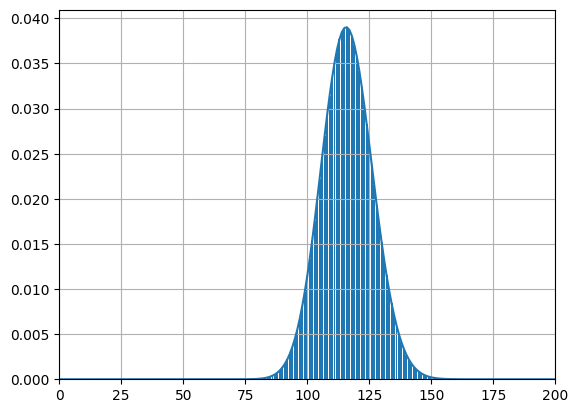

0.049760900949902404


In [55]:
distr = []
for k in range(0, n + 1):
    current_value = st.binom.pmf(k, n, p)
    distr.append(current_value)
plt.bar(x= range(0, n + 1), height= distr)
sns.lineplot(x= range(0, n + 1), y= distr)
plt.grid()
plt.xlim(0,200)
plt.show()
# Посчитаем вероятность привлечения менее 100 пользователей
error_probaility = st.binom.cdf(value-1, n,p)
print(error_probaility)

За счет большого `n` числа отправленных промокодов, распределение похоже на нормальное.

Вероятность не выполнить план очень близко к 5%.

<h3>Вывод:</h3> Необходимо раздать не менее 1161 промокода, чтобы с вероятностью в 95% не менее 100 пользователей продлило подписку.

 <h1>Задача №2 от отдела маркетинга</h1>

<h3>Условие:</h3>Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. Требуется оценить вероятность того, что уведомление откроют не более 399, 5 тыс. пользователей.


<h3>Формулировка:</h3> Можно рассматривать задачу следующим образом:

`n`=1 млн клиентам отправляют push-уведомления. Шанс, что  данный клиент откроет уведомление `p=40%`. Нужно найти вероятность того, что уведомление откроют не более: 399.5 тыс. пользователей.

<h3>План решения:</h3> С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399.5 тыс. пользователей.

<h3>Решение:</h3>

Выбор каждого клиента можно считать случайным событием с вероятностью успеха 40%. Всего таких выборов - `n` = 1000000. Перед нами биномиальный эксперимент(p=0.4, n = 1000000).

Т.к. `n` большое, а `p` близко к 0.5, то можно апроксимировать биномиальное распределение нормальным распределением и найти cdf для данного распределения с аргументами 399500.

Вероятность, что уведомление откроют не более 399500: 15.371708296369768% 


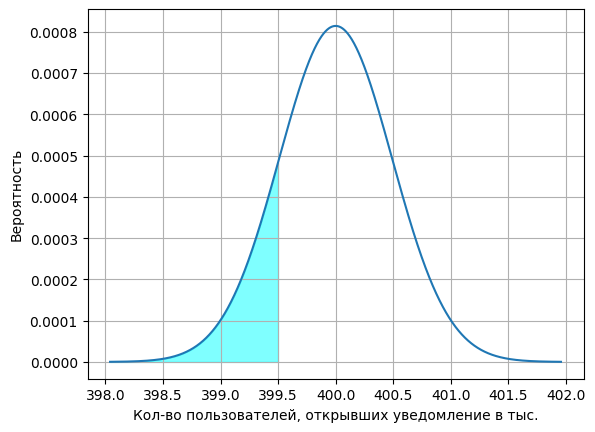

In [56]:
#биномиальное распределение задано данными:
n = 10**6
p = 0.4
value = 399500
# зададим мат.ожидание и ст.откл. нормального распределения равными
# мат.ожиданию и ст.откл. биномиального распределения
mu = n*p
std = (n*p*(1-p))**0.5
#задаём нормально распределение
destr = st.norm(mu, std)
#считаем вероятность, которую отсекает данный value
result = destr.cdf(value)
print(f'Вероятность, что уведомление откроют не более {value}: {result*100}% ')

#Построим примерный график распределения

#Границы
left = int(mu - 4 * std)
right = int(mu + 4 * std)
x = np.array(range(max(0, left), right))
#По оси x будем указывать в тысячах
plt.plot(x/1000, st.norm.pdf(x, mu, std))
plt.grid()
plt.xlabel('Кол-во пользователей, открывших уведомление в тыс.')
plt.ylabel('Вероятность')
#Закрасим площадь под графиком, при x<399.5 тыс., что соответсвует искомой вероятности
plt.fill_between(x/1000, st.norm.pdf(x, mu, std), 0, where= (x<value),  color='cyan', alpha=0.5)
plt.show()

Вывод: вероятность, что откроют не более 399500 уведомлений всего 15%. Получается, что с большей долей вероятности, будет открыто больше чем 399.5 тыс писем.

# Общий вывод

Было проведено исследование популярного сервиса аренды самокатов GoFast и проверены некоторые гипотезы, которые могут помочь бизнесу вырасти.

* В ходе предобработки данных были выявлены и удалены дубликаты, некоторым столбцам был изменен тип данных, и был добавлен новый столбец.
* Были проанализированы и визуализированы данные о:
  * Частоте встречаемости городов
  * Соотношение пользователей с подпиской и без подписки
  * Возрасте пользователей
  * Расстоянии, которое пользователь преодолевает за одну поездку
  * Продолжительность поездок
* Сомнительные и редкие значения были удалены из данных
* Была создана объединенная таблица поездок, в которой содержится вся информация о пользователе. В последствии она была разделена на 2 таблицы:
  * Пользователи без подписки
  * Пользователи с подпиской
* Проверили, отличается ли время поездки и расстояние от наличия у пользователя подписки.
* Был проведен подсчет помесячной выручки для каждого пользователя.
* Были проверены гипотезы для принятия решений о проведения акций с целью увеличения пользователей с подпиской.
* Решены задачи, поступившие от отдела маркетинга.

<h2>Выводы которые можно сделать после исследования:</h2>

1. Пользователей с подпиской free около 54%, тогда как на подписку ultra приходится около 46% пользователей.
2. Все города представлены примерно одинаково, но больше всего пользователей из Пятигорска, а меньше всего из Москвы.
3. Большинству пользоватей от 22 до 28 лет. Минимальный возраст пользователя - 12 лет, максимальный - 43 года, а средний - 25 лет.
4. В среднем расстояние, которое пользователь проезжает за 1 поездку около 3170 метров, а длится поездка в среднем 17.5 минут.
5. Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
6. Выручка от пользователей с подпиской больше, чем от пользователей без подписки.

<h1>Таким образом, пользователи с подпиской тратят больше времени на поездки, а в следствии, приносят больше прибыли. Для увеличения прибыли стоит увеличивать общее количество пользователей и повышать среди них процент пользователей с подпиской путем различных акций и промокодов.